In [1]:
import mdtraj as md
from os.path import join
from msmbuilder.featurizer import *
from msmbuilder.decomposition import tICA
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('white')

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
top = 'data/fs-peptide.pdb'
strajs = [md.load('data/trajectory-{}.xtc'.format(i+1), top=top, stride=10) for i in range(28)]
ref_traj = md.load('data/helix-reference.xtc', top=top)
n_atoms = ref_traj.n_atoms
all_indices = np.arange(n_atoms)
np.save('indices_all.npy', all_indices)

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


### Superpose feature

In [29]:
def plotmat(traj, **kwargs):
    fig, axes = plt.subplots(1, **kwargs)
    c = axes.imshow(traj)
    fig.colorbar(c)
    print('shape {}'.format(traj.shape))

In [30]:
feat = SuperposeFeaturizer(atom_indices=all_indices, reference_traj=ref_traj)
superpose_trajs = feat.fit_transform(strajs)

In [31]:
ttrajs = tICA(kinetic_mapping=True, n_components=10, lag_time=2.0).fit_transform(superpose_trajs)

shape (1000, 264)


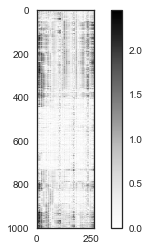

In [33]:
plotmat(superpose_trajs[1])

### RMSD feature

In [49]:
feat = RMSDFeaturizer(reference_traj=ref_traj[0], atom_indices=all_indices)
rmsd_trajs = feat.fit_transform(strajs)

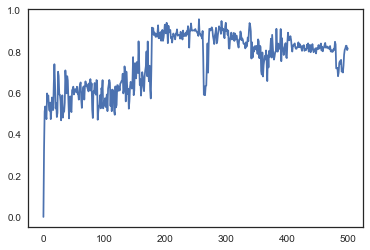

In [59]:
plt.plot(rmsd_trajs[0])

### LandMarkRMSDFeaturizer

In [69]:
feat = LandMarkRMSDFeaturizer(reference_traj=ref_traj[0], atom_indices=all_indices, sigma=1)
kern_rmsd_trajs = feat.fit_transform(strajs)

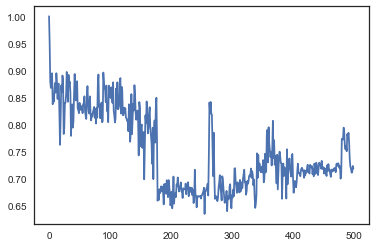

In [71]:
plt.plot(kern_rmsd_trajs[0])

### AtomPairsFeaturizer

In [5]:
bb_indices = np.load('bonds_bb.npy')
re_indices = np.load('bonds_re.npy')
all_bond_indices = np.concatenate((bb_indices, re_indices))
print(all_bond_indices.shape)
feat=AtomPairsFeaturizer(pair_indices=all_bond_indices)
bonds_trajs = feat.fit_transform(strajs)

(263, 2)


shape (500, 263)


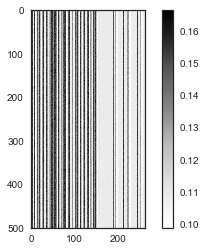

In [85]:
plotmat(bonds_trajs[1])


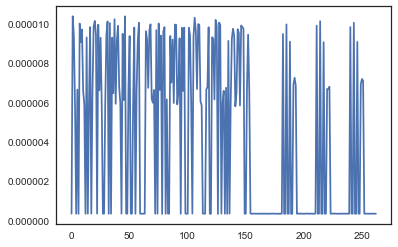

In [6]:
all_bonds_trajs = np.concatenate(bonds_trajs)
plt.plot(np.var(all_bonds_trajs, axis=0))

### DihedralFeaturizer

In [95]:
feat=DihedralFeaturizer(types=['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4'])
dihed_trajs = feat.fit_transform(strajs)


shape (500, 148)


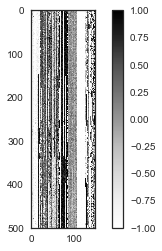

In [96]:
plotmat(dihed_trajs[0])


### VonMisesFeaturizer

In [113]:
feat = VonMisesFeaturizer(types=['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4'], n_bins=18, kappa=20.)
mises_trajs = feat.fit_transform(strajs)


shape (500, 1332)


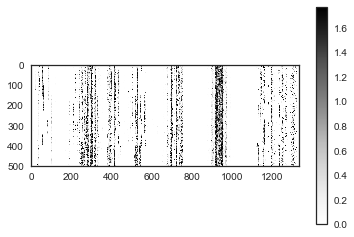

In [122]:
plotmat(mises_trajs[0])


 ### AlphaAngleFeaturizer

In [123]:
feat = AlphaAngleFeaturizer()
aa_trajs = feat.fit_transform(strajs)

shape (500, 36)


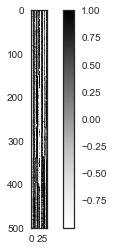

In [130]:
plotmat(aa_trajs[0])

### KappaAngleFeaturizer

In [132]:
feat = KappaAngleFeaturizer()
ka_trajs = feat.fit_transform(strajs)

shape (500, 17)


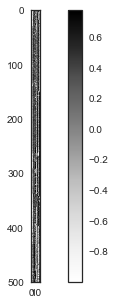

In [150]:
plotmat(ka_trajs[0], figsize=(10,5))

### SASAFeaturizer

In [135]:
feat = SASAFeaturizer()
sasa_trajs = feat.fit_transform(strajs)

shape (500, 23)


AttributeError: 'Figure' object has no attribute 'size'

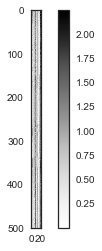

In [137]:
plotmat(sasa_trajs[0])


### ContactFeaturizer

In [153]:
feat = ContactFeaturizer()
con_trajs = feat.fit_transform(strajs)

shape (500, 171)
0.260452 2.58386


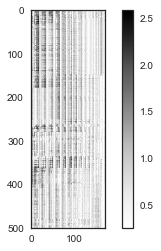

In [156]:
plotmat(con_trajs[0])
print(con_trajs[0].min(), con_trajs[0].max())

### LogisticContactFeaturizer

In [161]:
feat = LogisticContactFeaturizer()
logcon_trajs = feat.fit_transform(strajs)

shape (500, 171)


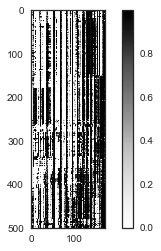

In [162]:
plotmat(logcon_trajs[0])


### RawPositionsFeaturizer

In [22]:
feat = RawPositionsFeaturizer()
raw_trajs = feat.fit_transform(strajs)

In [23]:
plotmat(raw_trajs[0])


NameError: name 'plotmat' is not defined

### DRIDFeaturizer

In [167]:
feat = DRIDFeaturizer()
drid_trajs = feat.fit_transform(strajs)

shape (500, 792)


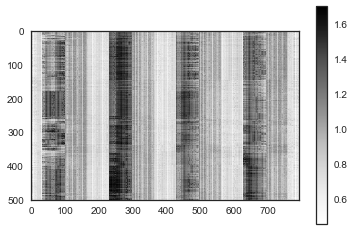

In [168]:
plotmat(drid_trajs[0])


In [37]:
from functions import angles, dihedrals
angles_re = np.load('angles_re.npy')
angles_bb = np.load('angles_bb.npy')
angles_all = np.concatenate([angles_re, angles_bb])
np.save('angles_all.npy', angles_all)
print(angles_all.shape)
feat = FunctionFeaturizer(angles, func_args = {'indices' : angles_all})
ang_trajs = feat.fit_transform(strajs)

(468, 3)


In [39]:
ttrajs = tICA(kinetic_mapping=True, n_components=10, lag_time=1.0).fit_transform(ang_trajs)

In [38]:
ttrajs = tICA(kinetic_mapping=True, n_components=10, lag_time=).fit_transform(ang_trajs)

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/msmbuilder-3.9.0.dev0-py3.5-macosx-10.6-x86_64.egg/msmbuilder/decomposition/tica.py:411: UserWarning: length of data (1000) is too short for the lag time (1000)
  warnings.warn("length of data (%d) is too short for the lag time (%d)" % (len(X), self.lag_time))


ValueError: All sequences were shorter than the lag time, 1000

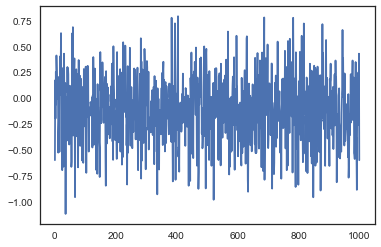

In [20]:
plt.plot(ttrajs[0].T[0])

In [26]:
ttrajs = tICA(kinetic_mapping=True, n_components=10, lag_time=2.0).fit_transform(raw_trajs)

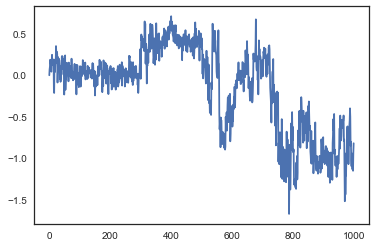

In [27]:
plt.plot(ttrajs[0].T[0])

In [34]:
from functions import dihedrals
dihed_re = np.load('dihed_re.npy')
dihed_bb = np.load('dihed_bb.npy')
dihed_all = np.concatenate([dihed_re, dihed_bb])
print(dihed_all.shape)
feat = FunctionFeaturizer(dihedrals, func_args = {'indices' : dihed_all})
dihed_trajs = feat.fit_transform(strajs)

(730, 4)


In [35]:
ttrajs = tICA(kinetic_mapping=True, n_components=10, lag_time=2.0).fit_transform(dihed_trajs)

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/msmbuilder-3.9.0.dev0-py3.5-macosx-10.6-x86_64.egg/msmbuilder/decomposition/tica.py:405: UserWarning: The number of features (1460) is greater than the length of the data (1000). The covariance matrix is not guaranteed to be positive definite.
  warnings.warn("The number of features (%d) is greater than the length of the data (%d). The covariance matrix is not guaranteed to be positive definite." % (X.shape[1], X.shape[0]))
